### Описание проекта

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

**без подписки**
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

**с подпиской Ultra**
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

***Цель исследования:***
1. Проанализировать общую информацию сервиса аренды самокатов GoFast о пользователях и поездках;
2. Осуществить подсчет помесячной выручки, которую принёс каждый пользователь сервиса аренды самокатов;
3. Определить какой вид использованиея сервиса аренды самокатов GoFast выгоднее (с подпиской "Ультра" или без);
4. Проверить гипотезы связанные с увеличением количества пользователей с подпиской "Ультра";
5. На основе полученных данных сформулировать выводы и рекомендации для бизнеса.

***Ход исследования:***
1. Получение данных из файлов:
- /datasets/users_go.csv
- /datasets/rides_go.csv
- /datasets/subscriptions_go.csv
2. Обзор данных, предварительная обработка данных (проверка на ошибки, пропуски, дубликаты, аномальные значения и др.). Создание, добавление, изменение необходимых столбцов;
4. Проведение исследовательского анализа данных. Объединение данных;
5. Произведение необходимых рассчетов. Проверка гипотез;
6. Написание общего вывода.

### Описание данных

***Таблица users (информация о пользователях):***

- user_id — уникальный идентификатор пользователя
- name — имя пользователя
- age — возраст пользователя 
- city — город 
- subscription_type — тип подписки (free, ultra)

***Таблица rides (информация о поездках):***

- user_id — уникальный идентификатор пользователя
- distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date — дата совершения поездки

***Таблица subscriptions (информация о подписке):***

- subscription_type — тип подписки
- minute_price — стоимость одной минуты поездки по данной подписке
- start_ride_price — стоимость начала поездки
- subscription_fee — стоимость ежемесячного платежа

## Шаг 1. Загрузка данных и ознакомление с ними

In [1]:
#импорт библиотек
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy import stats as st
from math import sqrt

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

### Общая информация о содержании данных.

***Изучим общую информацию о датафрейме users***

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Видим, что пропуски в столбцах отсутствуют. Строки имеют корректный вид.

***Изучим общую информацию о датафрейме rides***

In [5]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Пропуски в столбцах отсутствуют. Но здесь мы видим, что столбец "date" имеет тип "object", изменим его в следующем шаге.

***Изучим общую информацию о датафрейме subscriptions***

In [7]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Всего 2 строки. Строки имеют корректный вид.

## Шаг 2. Предобработка данных

***Датафрейм users***

Проверим, сколько в датафрейме уникальных пользователей и есть ли в данных явные дубликаты:

In [9]:
print('Количество строк в датафрейме users:', users.shape[0])
print('Количество уникальных пользователей:', users['user_id'].nunique())
print('Количество дубликатов:', users.duplicated().sum())

Количество строк в датафрейме users: 1565
Количество уникальных пользователей: 1534
Количество дубликатов: 31


Избавимся от явных дубликатов:

In [10]:
users=users.drop_duplicates()

In [11]:
#перепроверим
print('Количество дубликатов:', users.duplicated().sum())

Количество дубликатов: 0


***Датафрейм rides***

In [12]:
print('Количество строк в датафрейме users:', rides.shape[0])
print('Количество уникальных пользователей:', rides['user_id'].nunique())
print('Количество дубликатов:', rides.duplicated().sum())

Количество строк в датафрейме users: 18068
Количество уникальных пользователей: 1534
Количество дубликатов: 0


Количество уникальных пользователей 1534, ровно столько же как и в датафреме users. Явные дыбликаты в датафрейме отсутствуют.

Приведем столбец 'date' к типу даты pandas:

In [13]:
rides['date']=pd.to_datetime(rides['date'], format = '%Y-%m-%d')

Создадим новый столбец с номером месяца на основе столбца 'date':

In [14]:
rides['month']=rides['date'].dt.month

Округлим значения в столбце 'duration' до следующего целого числа:

In [15]:
rides['duration']=np.ceil(rides['duration'])

In [16]:
#посмотрим на изменения
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,26.0,2021-01-01,1
1,1,2617.592153,16.0,2021-01-18,1
2,1,754.159807,7.0,2021-04-20,4
3,1,2694.783254,19.0,2021-08-11,8
4,1,4028.687306,27.0,2021-08-28,8


## Шаг 3. Исследовательский анализ данных

### Общая информация о пользователях и поездках

####  Частота встречаемости городов

In [17]:
#посчитаем в каких городах больше всего пользователей
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

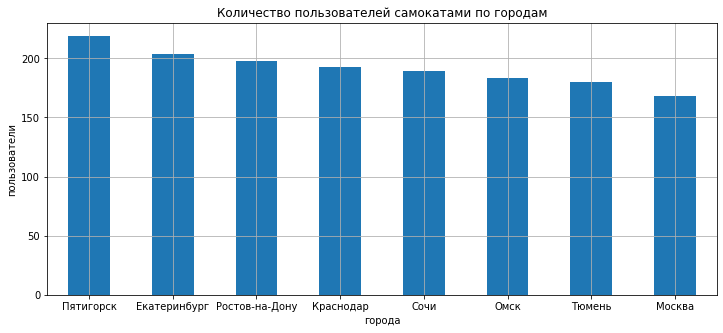

In [18]:
#посмотрим визуально
users['city'].value_counts()\
.plot(xlabel='города', 
      ylabel='пользователи', 
      kind='bar', 
      rot=0, 
      figsize=(12, 5), 
      grid=True, 
      title = 'Количество пользователей самокатами по городам')
plt.show()

Больше всего пользователей сервиса аренды самокатов сконцентрировано в г. Пятигорске, меньше всего в г. Москве. Можно предположить, что в Москве очень хорошо развит общественный транспорт и поэтому пользователей самокатами меньше,  в то время как в г. Пятигорске, например, отсутсвует метро. Мы также видим много пользователей самокатами и в других "южных городах" (Ростов-на-Дону, Краснодар, Сочи), возможно, там где больше отдыхающих - больше пользователей самокатами.

#### Cоотношение пользователей с подпиской и без подписки

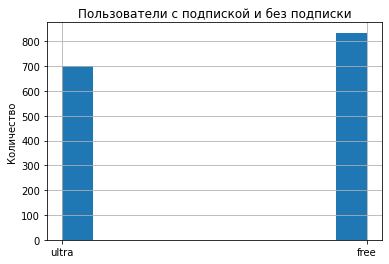

In [19]:
users['subscription_type'].hist()
plt.ylabel('Количество')
plt.title('Пользователи с подпиской и без подписки')
plt.show()

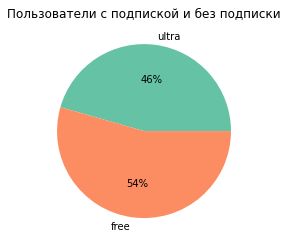

In [20]:
quantity = [699, 835]
labels = ['ultra', 'free']

colors = sns.color_palette('Set2')[ 0:5 ]

plt.pie(quantity, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Пользователи с подпиской и без подписки')
plt.show() 

In [21]:
users_free=users.loc[users['subscription_type'] == 'free']
print('Количество пользователей без подписки:', len(users_free))

Количество пользователей без подписки: 835


In [22]:
users_ultra=users.loc[users['subscription_type'] == 'ultra']
print('Количество пользователей c подпиской:', len(users_ultra))

Количество пользователей c подпиской: 699


Из общего количества, тех кто воспользовался сервисом аренды самокатов, чуть меньше половины оформляют подписку.

#### Возраст пользователей

In [23]:
users['age'].value_counts()

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

In [24]:
#посмотрим на минимальный/максимальный/средний возраст пользователей
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

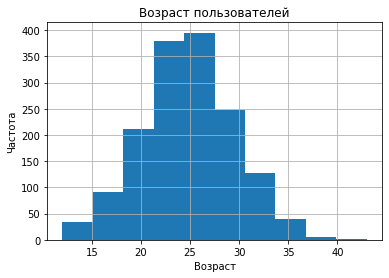

In [25]:
users['age'].hist()
plt.ylabel('Частота')
plt.xlabel('Возраст')
plt.title('Возраст пользователей')
plt.show()

Средний возраст пользователя сервиса аренды самокатов 25 лет. Странно видеть значения возраста от 12 до 17 лет, это не похоже на ошибку ввода, возможно сервис это допускает.

#### Расстояние, которое пользователь преодолел за одну поездку

In [26]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

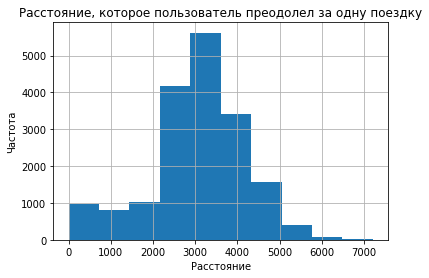

In [27]:
rides['distance'].hist()
plt.ylabel('Частота')
plt.xlabel('Расстояние')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.show()

Мы видим минимальное значение в 80 см и максимальное в 7,2 км. Медианное значение составляет 3,1 км. 

По типовым характеристикам самоката в среднем его заряда хватает на 20-40 км (с учетом стиля вождения, ровности дороги, температурного режима). 50-60 км самокат проезжает при полном заряде в идельных условиях для езды. Так много не проехал ни один пользователь :)

Посмотрим какие значения можно считать аномальными, постоим диграмму размаха:

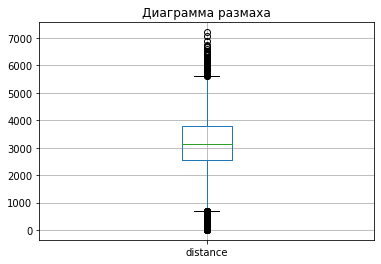

In [28]:
rides.loc[:,['distance']].boxplot() 
plt.title('Диаграмма размаха')
plt.show()

За пределы нормальных значений выходят поездки, расстояние у которых выше 5,6 км и ниже 800 м.

In [29]:
#посчитаем количество строк, где расстояние, которое проехал пользователь, больше 5,6 км
str_count = len(rides['distance'][rides['distance']>5600])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 134


In [30]:
#посчитаем количество строк, где расстояние,которое проехал пользователь, меньше 800 м
str_count = len(rides['distance'][rides['distance']<800])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 1078


Общее количество строк для удаления 1212, что составляет около 6% датасета. Можем их удалить.

In [31]:
rides = rides[rides['distance'] < 5600]
rides = rides[rides['distance'] > 800]

#### Продолжительность поездок

In [32]:
rides['duration'].describe()

count    16856.000000
mean        18.826353
std          5.752580
min          1.000000
25%         15.000000
50%         19.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

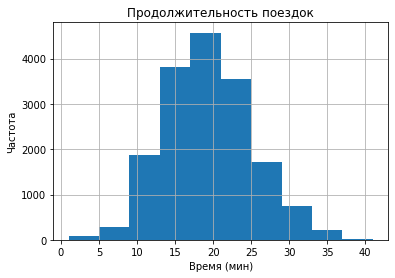

In [33]:
rides['duration'].hist()
plt.ylabel('Частота')
plt.xlabel('Время (мин)')
plt.title('Продолжительность поездок')
plt.show()

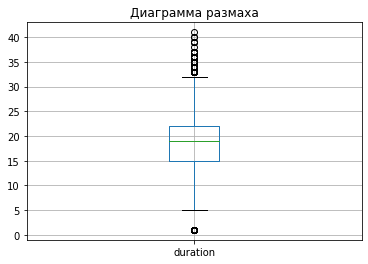

In [34]:
rides.loc[:,['duration']].boxplot() 
plt.title('Диаграмма размаха')
plt.show()

Можно сделать вывод, что самокатом редко пользуются меньше 3-х минут и больше 35 минут.

In [35]:
str_count = len(rides['duration'][rides['duration']<3])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 76


In [36]:
str_count = len(rides['duration'][rides['duration']>35])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 28


Общее количество строк для удаления 100, это допустимо, удалив их не выйдем за пределы 10 % датасета.

In [37]:
rides = rides[rides['duration'] > 3]
rides = rides[rides['duration'] < 35]

## Шаг 4. Объединение данных

In [38]:
#объединим датафреймы users и rides по общему столбцу 'user_id'
df_go_1 = users.merge(rides, on='user_id', how='outer')

In [39]:
df_go_1

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8
3,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8
4,1,Кира,22,Тюмень,ultra,2770.890808,17.0,2021-10-09,10
...,...,...,...,...,...,...,...,...,...
16702,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11
16703,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11
16704,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11
16705,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11


In [40]:
#объединим новый датафрейм df_go_1 с датафреймом subscriptions по общему столбцу 'subscription_type'
df_go = df_go_1.merge(subscriptions, on='subscription_type', how='outer')

In [41]:
df_go

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
3,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
4,1,Кира,22,Тюмень,ultra,2770.890808,17.0,2021-10-09,10,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
16703,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
16704,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
16705,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [42]:
#посмотрим есть ли пропуски
df_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Пользователи без подписки**

In [43]:
df_go_free=df_go.loc[df_go['subscription_type']=='free']
df_go_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6312,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6313,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6314,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6315,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6316,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
16703,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
16704,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
16705,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [44]:
print('Количество уникальных пользователей без подписки:', df_go_free['user_id'].nunique())

Количество уникальных пользователей без подписки: 835


***Среднее расстояние, которое пользователь без подписки преодолел за одну поездку***

In [45]:
df_go_free['distance'].describe()

count    10395.000000
mean      3225.734455
std        966.585839
min        801.005726
25%       2532.382024
50%       3209.304063
75%       3926.360557
max       5594.753114
Name: distance, dtype: float64

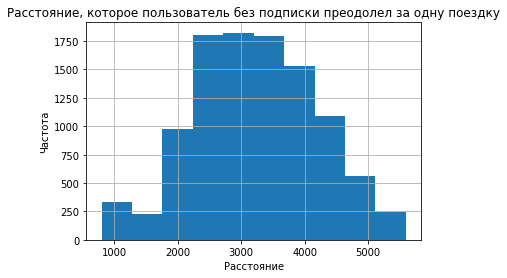

In [46]:
df_go_free['distance'].hist()
plt.ylabel('Частота')
plt.xlabel('Расстояние')
plt.title('Расстояние, которое пользователь без подписки преодолел за одну поездку')
plt.show()

Большинство пользователей без подписки проезжают на самокате расстояние в среднем от 2,1 до 3,5 км. Очень похоже на расстояние для прогулочного маршрута.

***Время, за которое пользователь без подписки совершил поездку***

In [47]:
df_go_free['duration'].describe()

count    10395.000000
mean        18.661183
std          5.671773
min          5.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         34.000000
Name: duration, dtype: float64

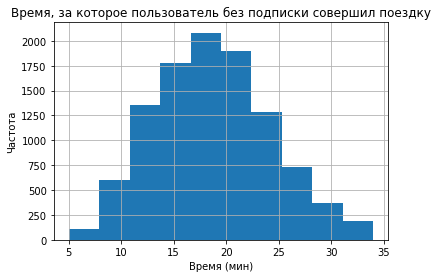

In [48]:
df_go_free['duration'].hist()
plt.ylabel('Частота')
plt.xlabel('Время (мин)')
plt.title('Время, за которое пользователь без подписки совершил поездку')
plt.show()

Время пользования самокатом пользователя без подписки в среднем составляет от 16 до 20 мин.

**Пользователи c подпиской "Ультра"**

In [49]:
df_go_ultra=df_go.loc[df_go['subscription_type']=='ultra']
df_go_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
3,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
4,1,Кира,22,Тюмень,ultra,2770.890808,17.0,2021-10-09,10,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6307,699,Оксана,22,Москва,ultra,3973.046497,25.0,2021-08-29,8,6,0,199
6308,699,Оксана,22,Москва,ultra,3288.702563,16.0,2021-09-12,9,6,0,199
6309,699,Оксана,22,Москва,ultra,3076.159348,15.0,2021-09-26,9,6,0,199
6310,699,Оксана,22,Москва,ultra,4707.845501,16.0,2021-10-17,10,6,0,199


In [50]:
print('Количество уникальных пользователей без подписки:', df_go_ultra['user_id'].nunique())

Количество уникальных пользователей без подписки: 699


***Расстояние, которое пользователь с подпиской "Ультра" преодолел за одну поездку***

In [51]:
df_go_ultra['distance'].describe()

count    6312.000000
mean     3163.674223
std       751.345644
min       800.257537
25%      2811.906432
50%      3156.466537
75%      3562.224852
max      5419.684636
Name: distance, dtype: float64

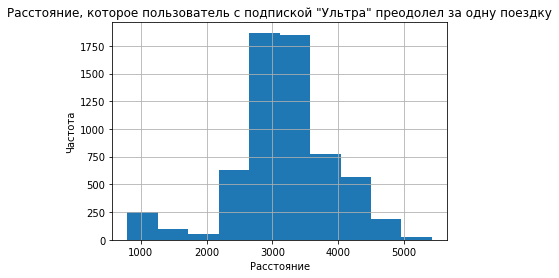

In [52]:
df_go_ultra['distance'].hist()
plt.ylabel('Частота')
plt.xlabel('Расстояние')
plt.title('Расстояние, которое пользователь с подпиской "Ультра" преодолел за одну поездку')
plt.show()

Большинство пользователей с подпиской проезжают на самокате расстояние в среднем от 2,7 до 3,5 км. Чуть больше,чем пользователи без подписки. 

***Время, за которое пользователь с подпиской "Ультра" совершил поездку***

In [53]:
df_go_ultra['duration'].describe()

count    6312.000000
mean       19.116603
std         5.299584
min         5.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        34.000000
Name: duration, dtype: float64

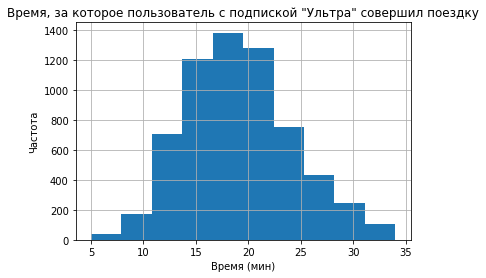

In [54]:
df_go_ultra['duration'].hist()
plt.ylabel('Частота')
plt.xlabel('Время (мин)')
plt.title('Время, за которое пользователь с подпиской "Ультра" совершил поездку')
plt.show()

Время пользования самокатом пользователя с подпиской "Ультра" в среднем составляет от 16 до 22 мин.

## Шаг 5. Подсчёт выручки

### Подсчет выручки для пользователей без подписки

In [55]:
df_go_free_group_by_month = df_go_free.groupby(['user_id','month'])\
.agg({'distance':'sum', 'duration':'sum','user_id':'count'})\
.rename(columns={'duration':'month_rides_duration','distance':'month_rides_distance', 'user_id':'number_of_rides'})

In [56]:
df_go_free_group_by_month.head(13)

month_rides_distance  month_rides_duration  number_of_rides
user_id month                                                             
700     1               2515.690719                  15.0                1
        2              13446.659764                  89.0                5
        3               3798.334905                  19.0                1
        4               2984.551206                  16.0                1
        6               5927.650988                  29.0                2
        7               4110.232038                  16.0                1
        8               4071.654669                  17.0                1
        10              6322.578618                  44.0                2
        11              8735.782625                  32.0                3
701     1               2676.472894                  18.0                1
        2               5637.334007                  27.0                2
        3               2802.021357                  17.0                1
        4               3509.012965                  14.0                1

In [57]:
#(стоимость старта поездки × количество поездок) + (стоимость одной минуты поездки × общую продолжительность всех поездок в минутах) 
df_go_free_group_by_month['revenue'] = (df_go_free_group_by_month['number_of_rides']*50)\
+(df_go_free_group_by_month['month_rides_duration']*8)

In [58]:
df_go_free_group_by_month

month_rides_distance  month_rides_duration  number_of_rides  \
user_id month                                                                
700     1               2515.690719                  15.0                1   
        2              13446.659764                  89.0                5   
        3               3798.334905                  19.0                1   
        4               2984.551206                  16.0                1   
        6               5927.650988                  29.0                2   
...                             ...                   ...              ...   
1534    6               3214.021065                  19.0                1   
        8               7622.453034                  48.0                2   
        9               4928.173852                  23.0                1   
        11             13350.015305                  78.0                4   
        12              2371.711192                  16.0                1   

               revenue  
user_id month           
700     1        170.0  
        2        962.0  
        3        202.0  
        4        178.0  
        6        332.0  
...                ...  
1534    6        202.0  
        8        484.0  
        9        234.0  
        11       824.0  
        12       178.0  

[6407 rows x 4 columns]

In [59]:
df_go_free_group_by_month['revenue'].describe()

count    6407.000000
mean      323.336039
std       176.077220
min        90.000000
25%       194.000000
50%       258.000000
75%       420.000000
max      1382.000000
Name: revenue, dtype: float64

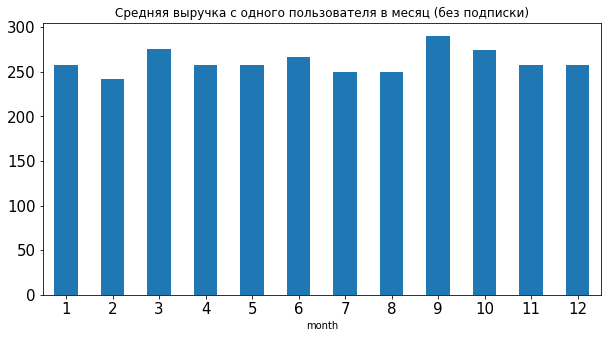

In [60]:
(
    df_go_free_group_by_month.groupby('month')
.median()['revenue']
.reset_index()
.sort_values(by='month')
.plot(x='month', 
      y='revenue', 
      kind='bar', 
      figsize=(10,5), 
      legend=False,
      title='Средняя выручка с одного пользователя в месяц (без подписки)', 
      rot = 0,
      fontsize=15)
)
plt.show()

Таким образом, средняя выручка с одного без подписки пользователя в месяц составляет около 255 руб. В марте, сентябре и октябре выручка с пользователей без подписки чуть выше. В зимние месяцы выручка ниже.

### Подсчет выручки для пользователей с тарифом "Ультра"

In [61]:
df_go_ultra_group_by_month = df_go_ultra.groupby(['user_id','month'])\
.agg({'distance':'sum', 'duration':'sum','user_id':'count'})\
.rename(columns={'duration':'month_rides_duration','distance':'month_rides_distance', 'user_id':'number_of_rides'})

In [62]:
df_go_ultra_group_by_month

month_rides_distance  month_rides_duration  number_of_rides
user_id month                                                             
1       1               7027.511294                  42.0                2
        8               6723.470560                  46.0                2
        10              5809.911100                  32.0                2
        11              6254.808719                  40.0                2
        12              6751.629942                  28.0                2
...                             ...                   ...              ...
699     6               4072.797406                  17.0                1
        8               7018.324143                  45.0                2
        9               6364.861911                  31.0                2
        10              4707.845501                  16.0                1
        12              3202.890770                  26.0                1

[4442 rows x 3 columns]

In [63]:
#количество поездок + (стоимость одной минуты поездки × общую продолжительность всех поездок в минутах) + стоимость абонентской платы 199 руб
df_go_ultra_group_by_month['revenue'] = df_go_ultra_group_by_month['number_of_rides']+\
(df_go_ultra_group_by_month['month_rides_duration']*6)+199

In [64]:
df_go_ultra_group_by_month

month_rides_distance  month_rides_duration  number_of_rides  \
user_id month                                                                
1       1               7027.511294                  42.0                2   
        8               6723.470560                  46.0                2   
        10              5809.911100                  32.0                2   
        11              6254.808719                  40.0                2   
        12              6751.629942                  28.0                2   
...                             ...                   ...              ...   
699     6               4072.797406                  17.0                1   
        8               7018.324143                  45.0                2   
        9               6364.861911                  31.0                2   
        10              4707.845501                  16.0                1   
        12              3202.890770                  26.0                1   

               revenue  
user_id month           
1       1        453.0  
        8        477.0  
        10       393.0  
        11       441.0  
        12       369.0  
...                ...  
699     6        302.0  
        8        471.0  
        9        387.0  
        10       296.0  
        12       356.0  

[4442 rows x 4 columns]

In [65]:
df_go_ultra_group_by_month['revenue'].describe()

count    4442.000000
mean      363.407024
std        86.733177
min       230.000000
25%       302.000000
50%       332.000000
75%       405.000000
max       961.000000
Name: revenue, dtype: float64

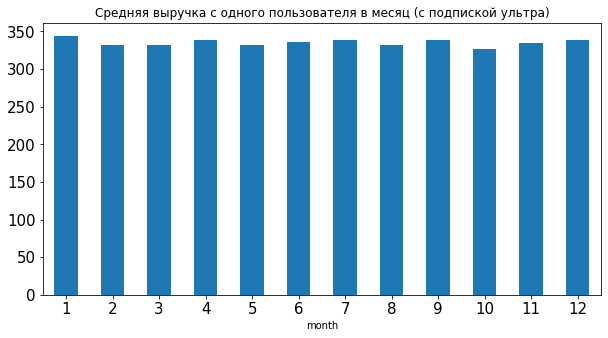

In [66]:
(
    df_go_ultra_group_by_month.groupby('month')
.median()['revenue']
.reset_index()
.sort_values(by='month')
.plot(x='month', 
      y='revenue', 
      kind='bar', 
      figsize=(10,5), 
      legend=False,
      title='Средняя выручка с одного пользователя в месяц (с подпиской ультра)', 
      rot = 0,
      fontsize=15)
)
plt.show()

Средняя выручка с одного пользователя, имеющего подписку в месяц составляет около 330 руб. При этом столбцы на графике практически не отличаются друг от друга, видимо, при наличии подписки, выручка имеет более стабильный характер.

***Общая выручка за все время***

In [67]:
print('Общая выручка от пользователей без подписки:', df_go_free_group_by_month['revenue'].sum())
print('Общая выручка от пользователей с подпиской "Ультра":', df_go_ultra_group_by_month['revenue'].sum())

Общая выручка от пользователей без подписки: 2071614.0
Общая выручка от пользователей с подпиской "Ультра": 1614254.0


Не смотря на то, что пользователи с подпиской приносят больше в месяц, большую часть выручки за все время составляют пользователи без подписки.

## Шаг 6. Проверка гипотез

### Выясним, тратят ли пользователи с подпиской больше времени на поездки и проверим, могут ли пользователи с подпиской быть «выгоднее» для компании.

Сформулируем гипотезы:

- H0: Длительность поездок пользователей без подписки и с подпиской «Ультра» равны.
- H1: Длительность поездок пользователей с подпиской «Ультра» больше.

In [68]:
#Иипользуем исходные данные о продолжительности поездок — отдельно для подписчиков и тех, у кого нет подписки.
free_duration = df_go_free['duration']
ultra_duration = df_go_ultra['duration']

alpha = 0.05

results = st.ttest_ind(free_duration, ultra_duration, alternative='greater')

print(f'p-value: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9999998732104943
Нет оснований отвергнуть нулевую гипотезу


**Вывод:** Длительность поездок пользователей с подпиской «Ультра» не выше длительности поездок пользователей без подписки. С этой точки зрения нельзя считать, что пользователи с подпиской «выгоднее» для компании.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

В данном случае для проверки гипотезы о равенстве среднего генеральной совокупности значению 3130 м используем t-тест, который осуществит сравнение посчитанной на одной выборке статистики с заданным значением. Итак, сформулируем гипотезы:
​
- H0: Расстояние одной поездки пользователя с подпиской "Ультра" в среднем составляет 3130 м. (оптимальное расстояние с точки зрения износа самоката);
- H1: Пользователь с подпиской "Ультра" в среднем проезжает расстояние больше оптимального. 

In [69]:
ultra_distance = df_go_ultra['distance']

interested_value = 3130 

alpha = 0.05 

results = st.ttest_1samp(
    ultra_distance, 
    interested_value,
    alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.00018626154249184768
Отвергаем нулевую гипотезу


**Вывод:** Среднее расстояние, которое проезжают пользователи с подпиской "Ультра" за одну поездку, превышает 3130 метров. Это говорит о том, что самокаты подвергаются повышенному износу во время эксплуатации, в связи с чем требуют более внимательной регулярной проверки и технического обслуживания. Возможно осуществлять такую проверку неоходимо чаще обычного.

### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. 

Из проведенного выше анализа мы видим, что пользователи с подпиской «Ультра» приносят большую помесячную выручку сервису аренды самокатов.
Исследуемые нами данные являются выборками из общего числа всех пользователей (генеральных совокупностей). Чтобы с уверенностью сказать какой вариант использования сервиса выгоднее (с подпиской или без), необходимо проверить есть ли статистически значимое различие между средними значениями генеральных совокупностей пользователей двух типов подписок.

Сформулируем гипотезы:

- H0: Помесячная выручка пользователей без подписки и с подпиской «Ультра» не различается.
- H1: Помесячная выручка пользователей с подпиской «Ультра» выше, чем выручка от пользователей без подписки.

In [70]:
free = df_go_free_group_by_month['revenue']
ultra = df_go_ultra_group_by_month['revenue']

alpha = 0.05

results = st.ttest_ind(ultra, free, alternative='greater')

print(f'p-value: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.1955031782439213e-44
Отвергаем нулевую гипотезу


**Вывод:** Нулевую гипотезу мы отвергаем. Пользователи, которые имеют подписку выгоднее для сервиса, чем пользователи без подписки. 

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае мы анализируем одну генеральную совокупность, с которой произошли некоторые изменения, мы проверяем равны ли средние совокупности до и после этого изменения. Выборки в этом случае будут зависимыми.

Гипотезы можно сформулировать следующим образом:
- H0: Среднее генеральной совокупности равно среднему количеству обращений до обновления сервиса;
- H1: Среднее генеральной совокупности после обновления сервиса меньше среднего количества обращений до обновления сервиса.

Для проверки гипотезы будем использовать метод scipy.stats.ttest_rel(). В качестве аргументов передадим следующие параметры: 
- данные о количестве обращений до обновления;
- данные о количестве обращений после обновления;
- параметр alternative='less', для того чтобы проверить, что среднее генеральной совокупности до изменения меньше, чем после изменения.

## Шаг 7. Распределения

### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [71]:
n = 1000000 # количество уведомлений 
p = 0.4 # вероятность, что уведомление будет открыто клиентом

# рассчитаем параметры нормального распределения
mu = n * p 
sigma = sqrt(n * p * (1 - p)) 

distr = st.norm(mu, sigma) 

result = distr.cdf(399500) # найдем вероятность
print(result)

0.15371708296369768


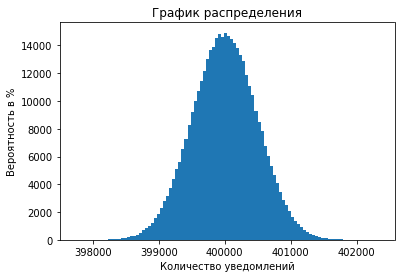

In [72]:
binom_sim = stats.binom.rvs(n = 1000000, p =0.4, size = 399500)
plt.hist(binom_sim, bins = 100, density = False)
plt.ylabel('Вероятность в %')
plt.xlabel('Количество уведомлений')
plt.title('График распределения')
plt.show()

Вероятность, что того, что из 1 млн уведомлений пользователи откроют не более 399,5 тыс. около 15%.

## Общий вывод

**Мы проанализировали данные сервиса аренды самокатов GoFast о некоторых пользователях и их поездках, провели предобработку данных, исследовательский анализ, проверили некоторые гипотезы, в результате чего:**

- В данных были найдены и удалены неявные дубликаты, аномальные значения. Данные в некоторых столбцах были приведены к нужным типам;
- Для более удобного анализа были созданы датафреймы c данными о пользователях без подписки и с данными о пользователях с подпиской;
- Была изучена основная информация о пользователях и поездках (частота встречаемости городов, соотношение пользователей с подпиской и без подписки, возраст пользователей, расстояние, которое пользователь преодолел за одну поездку, средняя продолжительность поездок), после чего сделаны выводы, построены графики;
- Осуществили подсчет помесячной выручки, которую принёс каждый пользователь. Визуализировали данные;
- Проверить гипотезы о том тратят ли пользователи с подпиской больше времени на поездки, о средней продолжительности одной поездки и о том, будет ли помесячная выручка от пользователей с подпиской выше чем от пользователей без подписки;
- Оценили вероятность успеха рассылки клиентам push-уведомления в мобильном приложении.

**Из полученных данных были выявлены следующие наблюдения:**

- Из представленых сведениях о городах, мы сделали вывод, что больше всего пользователей сервиса аренды самокатов сконцентрировано в г. Пятигорске, а меньше всего в г. Москве. Можно предположить, что в Москве очень хорошо развит общественный транспорт и поэтому пользователей самокатами меньше,  в то время как в г. Пятигорске, например, отсутсвует метро. Мы также видим много пользователей самокатами и в других "южных городах" (Ростов-на-Дону, Краснодар, Сочи), возможно, там где больше отдыхающих - больше пользователей самокатами;

- Из общего количества, тех кто воспользовался сервисом аренды самокатов, только меньше половины оформляют подписку;

- Средний возраст пользователя сервиса аренды самокатов - 25 лет. Также среди пользователей мы встретили и детей в возрасте от 12 до 17 лет, возможно сервис это допускает и не ограничивает возраст пользования самокатом. С точки зрения безопасности сервису лучше ввести ограничение на пользование электросамокатом до достижения 18 лет;

- Среднее расстояние, которое пользователь преодолел за одну поездку составляет 3,1 км. Большинство пользователей без подписки проезжают на самокате расстояние в среднем от 2,1 до 3,5 км, а пользователи с подпиской "Ультра" от 2,7 до 3,5 км. Такое расстояние характерно для езды по прогулочному маршруту, поездки до метро/остановки или, например, объезда пробки. Самокаты в настоящее время используются больше как средство для преодоления коротких дистанций и не заменяют привычные средства передвижения на дальние расстояния;

- Относительно времени пользования самокатом, сделан вывод, что им редко пользуются меньше 3-х и больше 35 минут. Время пользования самокатом пользователя без подписки в среднем составляет от 16 до 20 мин, а пользователя с подпиской "Ультра" от 16 до 22 мин;

- Средняя выручка в месяц с одного пользователя без подписки составляет около 255 руб. В марте, сентябре и октябре выручка с пользователей без подписки чуть выше, а в зимние месяцы выручка ниже. 

- Средняя выручка  в месяц с одного пользователя, имеющего подписку, составляет около 330 руб. При этом в разные месяцы выручка практически не отличается, то есть она имеет относительно стабильный характер. Не смотря на то, что пользователи с подпиской приносят больше в месяц, большую часть выручки за все время составляют пользователи без подписки. 

- Общая выручка с пользователей без подписки для сервиса составила чуть выше 2 млн., а общая выручка с пользователей, у которых есть подписка 1,6 млн. 


***Проверка гипотез:***
- Длительность поездок пользователей с подпиской «Ультра» не выше длительности поездок пользователей без подписки. С этой точки зрения нельзя считать, что пользователи с подпиской «выгоднее» для компании;

- Среднее расстояние, которое проезжают пользователи с подпиской "Ультра" за одну поездку, не превышает 3130 метров. Таким образом, самокаты в настоящее время используются больше как средство для преодоления коротких дистанций и не заменяют привычные средства передвижения на дальние расстояния;

- Пользователи, которые имеют подписку выгоднее для сервиса, чем пользователи без подписки.